1. Написать программу, оценивающую значение *машинного эпсилон* для стандартных чисел с двойной точностью.

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [2]:
eps = 1
while 1 + eps/2 != 1:
    eps = eps/2
print ('epsilon =', eps)

epsilon = 2.220446049250313e-16


2. Привести пример функции, производную которой нельзя вычислить методом дифференцирования с комплексным шагом.

In [3]:
# Функции, которые нельзя неоднозначно продолжить на комплексную плоскость,
#например f = log

3. Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.

Вычислим производную в точке Pi/4 для функции sin(x)

In [4]:
def f(x):
    return np.sin(x)

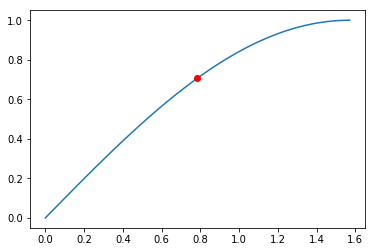

In [5]:
x_axis = np.linspace(0, np.pi/2, 1001)
plt.plot(x_axis, [f(x) for x in x_axis])
plt.plot(np.pi/4, f(np.pi/4), 'o', color = 'Red')

## Дифференцирование с комплексным шагом

J. N. Lyness, C. B. Moler, _Numerical differentiation of analytic functions_, SIAM J. Numerical Analysis **4**, 202 (1967).

http://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/

Предположим, что функция $f(x)$ может быть продолжена в комплексную плоскость, и результат, $f(z) = u(x, y) + i v(x, y)$, является аналитической функцией переменной $z = x + iy$. Тогда, согласно условиям Коши-Римана:

$$
\frac{\partial u }{\partial x} = \frac{\partial v}{\partial y}
$$

В точке $z = x + i\,0$,

\begin{align}
\frac{df}{dx} &\equiv \left. \frac{\partial u}{\partial x} \,\right|_{(x, 0)} \\
              &= \frac{\partial v}{\partial y} \\
              &= \lim_{h\to 0} \frac{v(x, h) - v(x, 0)}{h} \qquad\qquad (v(x, 0)\equiv 0)\\
              &\equiv \lim_{h\to 0} \frac{\mathrm{Im}\,{f(x + ih)}}{h}
\end{align}

In [6]:
def deriv_complex(f, x, h):
    return( f(x + 1j*h).imag / h )

In [7]:
for i in range(1, 10):
    h = 10**(-i) #комплексный шаг
    print('Шаг =', h)
    print('Производная =',deriv_complex(f, np.pi/4, h))
    print()

Шаг = 0.1
Производная = 0.7082858818844947

Шаг = 0.01
Производная = 0.707118566358493

Шаг = 0.001
Производная = 0.7071068990376835

Шаг = 0.0001
Производная = 0.7071067823650589

Шаг = 1e-05
Производная = 0.7071067811983327

Шаг = 1e-06
Производная = 0.7071067811866655

Шаг = 1e-07
Производная = 0.7071067811865488

Шаг = 1e-08
Производная = 0.7071067811865476

Шаг = 1e-09
Производная = 0.7071067811865476

